In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Print dataset information
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


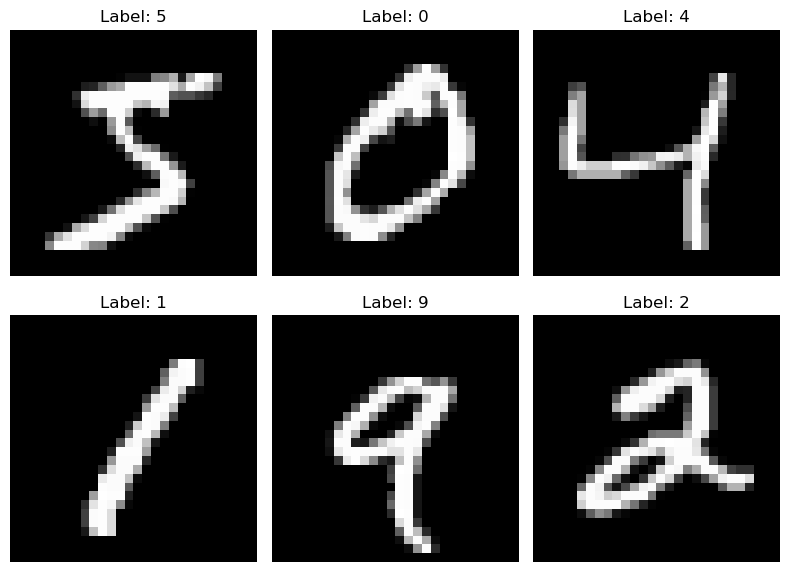

In [4]:
# Display a sample image
plt.figure(figsize=(8, 6))
plt.subplot(2, 3, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')

# Show a few more examples
for i in range(1, 6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
print(f"Normalized training data range: {x_train.min()} to {x_train.max()}")
print(f"Label shape after one-hot encoding: {y_train.shape}")

Normalized training data range: 0.0 to 1.0
Label shape after one-hot encoding: (60000, 10)


In [8]:
# Build model (neural network)
model = Sequential([
    Flatten(input_shape=(28,28)),   # Flatten 28x28 images
    Dense(128, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax') # Output layer
])

c:\Users\Msi\miniconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2776 - val_accuracy: 0.9479 - val_loss: 0.1758
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9624 - loss: 0.1260 - val_accuracy: 0.9645 - val_loss: 0.1135
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0882 - val_accuracy: 0.9655 - val_loss: 0.1151
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0636 - val_accuracy: 0.9729 - val_loss: 0.0887
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9756 - val_loss: 0.0839


In [11]:
# Evaluate model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")
print(f"Test Loss: {loss*100:.2f}%")

Test Accuracy: 97.49%
Test Loss: 8.38%


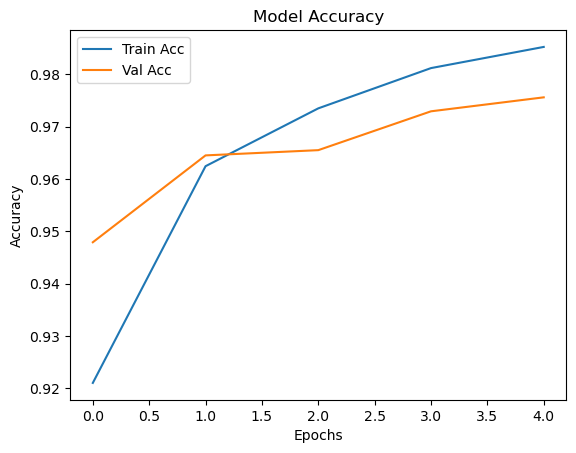

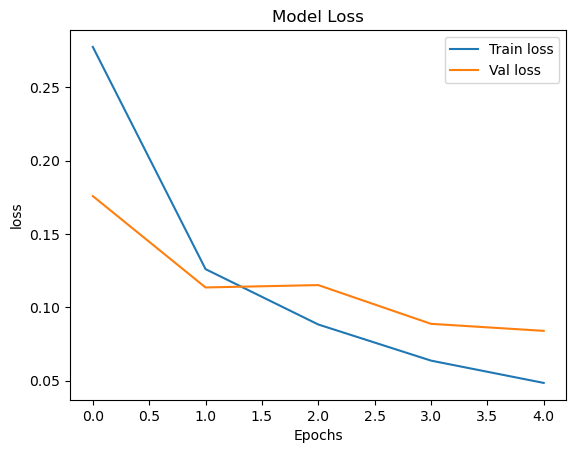

In [12]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


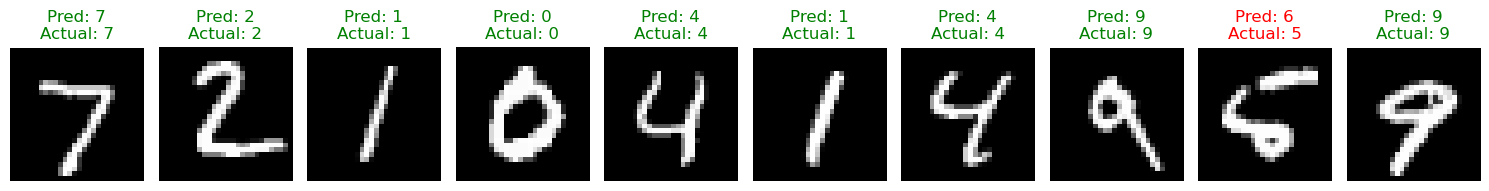

In [13]:
# Show results

# Make predictions on test set
predictions = model.predict(x_test)

# Function to display predictions
def display_predictions(num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_test[i], cmap='gray')

        # Get predicted and actual labels
        predicted_label = np.argmax(predictions[i])
        actual_label = np.argmax(y_test[i])

        # Color: green if correct, red if incorrect
        color = 'green' if predicted_label == actual_label else 'red'
        plt.title(f'Pred: {predicted_label}\nActual: {actual_label}', color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample predictions
display_predictions()

In [14]:
# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

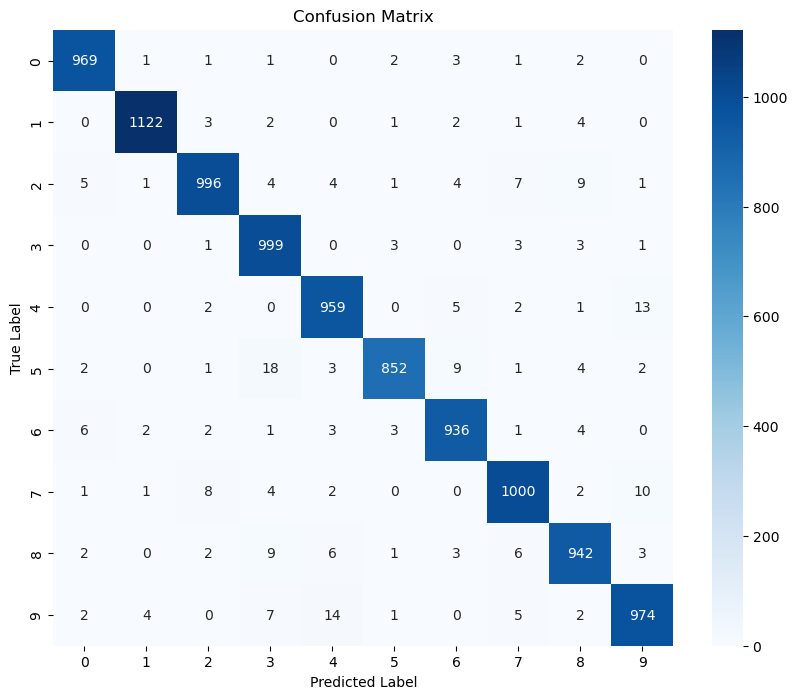

In [15]:
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [16]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



In [17]:
# Reshape data for CNN (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [18]:
# ---------------- CNN Model ----------------
cnn_model = Sequential([
    # First Convolution + Pooling
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    # Second Convolution + Pooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Msi\miniconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [20]:
# Train CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32,
                            validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9557 - loss: 0.1448 - val_accuracy: 0.9741 - val_loss: 0.0877
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9862 - val_loss: 0.0520
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9868 - val_loss: 0.0428
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9899 - val_loss: 0.0394


In [21]:
# Evaluate CNN model
loss, acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {acc*100:.2f}%")
print(f"CNN Test loss: {loss*100:.2f}%")

CNN Test Accuracy: 99.10%
CNN Test loss: 2.85%


In [22]:
# Evaluate MLP model (your original model)
mlp_loss, mlp_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_acc*100:.2f}%")

# Evaluate CNN model (the one we added)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc*100:.2f}%")

#  Comparison 
if cnn_acc > mlp_acc:
    print("✅ CNN performed better than MLP")
elif cnn_acc < mlp_acc:
    print("✅ MLP performed better than CNN")
else:
    print("Both models achieved the same accuracy")


MLP Test Accuracy: 97.49%
CNN Test Accuracy: 99.10%
✅ CNN performed better than MLP


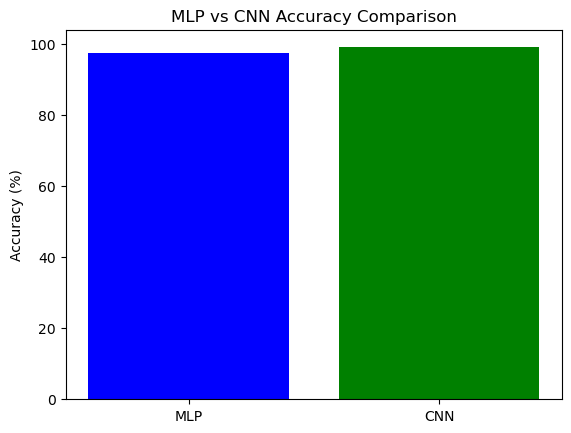

In [23]:
# Accuracy values
models = ['MLP', 'CNN']
accuracies = [mlp_acc*100, cnn_acc*100]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel("Accuracy (%)")
plt.title("MLP vs CNN Accuracy Comparison")
plt.show()


Save Models

In [27]:
# Save CNN model inside the folder
model.save("cnn_mnist.h5")

print("✅ Models saved successfully inside 'saved_models' folder")


✅ Models saved successfully inside 'saved_models' folder
